In [56]:
import pandas as pd

# Load the data
file_path = 'results_temp/comparison_optimal_500.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and a summary of the data
pd.set_option('display.max_rows', 24)
data.iloc[:36,:]


,IpwEpsGreedy,IpwBootTS,RandomAction,eps_greedy_policy,optimal_outcome_actions,optimal_policy,optimal_outcome_policy
0,2758.583786,2928.739839,2710.556882,66,4066.350544,88,3504.939130
1,3080.634350,3513.963668,2530.810135,66,4449.930195,88,3501.801837
2,3849.241803,3795.950639,3368.870548,29,4348.424224,36,4060.950011
3,3226.087554,3358.558738,2764.454110,29,4261.068828,25,3220.646968
4,3447.789650,3351.477990,3180.469780,29,4424.626732,97,3583.248661
...,...,...,...,...,...,...,...
31,3535.044982,3587.224325,2995.819084,97,4348.782584,29,3584.167268
32,3554.160724,3780.396076,2900.268488,97,4290.645604,29,3770.942254
33,3632.744453,4093.267363,3236.381013,29,4413.977349,29,3583.368032
34,3135.134179,3521.159154,2987.210670,97,4019.963550,29,3522.677052


/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yiyang/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

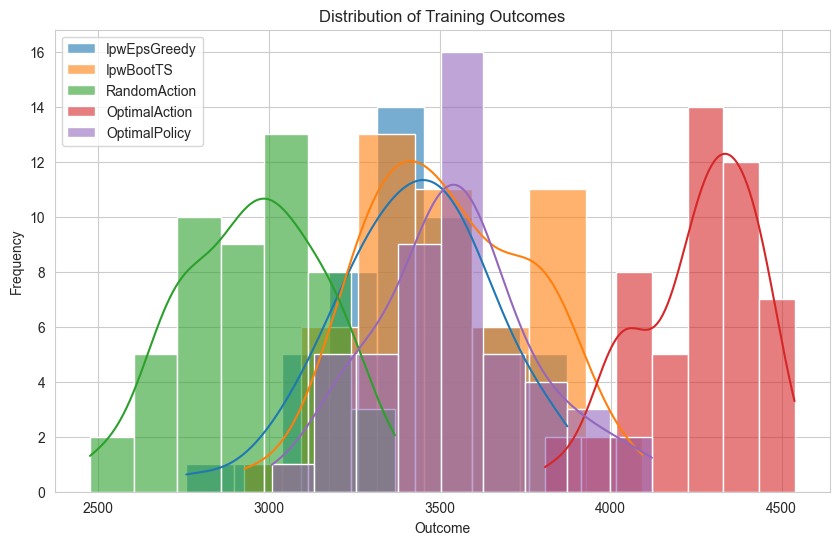

(-2.1658400758646694, 0.032749463344100525)

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set the style of the visualizations
sns.set_style("whitegrid")

# Plot the distributions of both methods
plt.figure(figsize=(10, 6))
sns.histplot(data['IpwEpsGreedy'],  kde=True, label='IpwEpsGreedy', alpha=0.6)
sns.histplot(data['IpwBootTS'],  kde=True, label='IpwBootTS', alpha=0.6)
sns.histplot(data['RandomAction'], kde=True, label='RandomAction', alpha=0.6)
sns.histplot(data['optimal_outcome_actions'],  kde=True, label='OptimalAction', alpha=0.6)
sns.histplot(data['optimal_outcome_policy'],  kde=True, label='OptimalPolicy', alpha=0.6)

plt.title('Distribution of Training Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Conduct a two-sample t-test to compare the means
t_stat, p_value = ttest_ind(data['IpwEpsGreedy'], data['IpwBootTS'])

t_stat, p_value


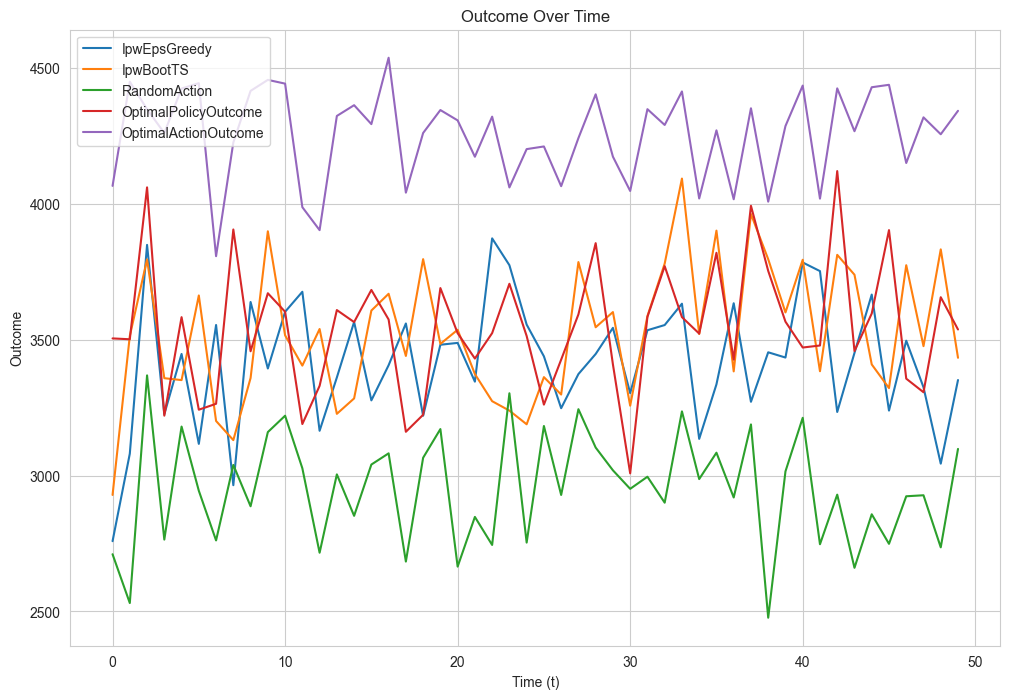

In [50]:
import matplotlib.pyplot as plt

# Assuming row index as the time variable for plotting
# Let's plot a few selected columns to keep the plot readable

plt.figure(figsize=(12, 8))

# Plotting selected columns
plt.plot(data.index, data['IpwEpsGreedy'], label='IpwEpsGreedy')
plt.plot(data.index, data['IpwBootTS'], label='IpwBootTS')
plt.plot(data.index, data['RandomAction'], label='RandomAction')
plt.plot(data.index, data['optimal_outcome_policy'], label='OptimalPolicyOutcome')
plt.plot(data.index, data['optimal_outcome_actions'], label='OptimalActionOutcome')

plt.title('Outcome Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Outcome')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()


In [51]:
# Modifying the values by subtracting the current value from the optimal action value
data_modified = data.copy()  # Creating a copy to modify values

# Subtracting the current values from the optimal action value for selected columns
data_modified['IpwEpsGreedy_diff'] = data['optimal_outcome_actions'] - data['IpwEpsGreedy']
data_modified['IpwBootTS_diff'] = data['optimal_outcome_actions'] - data['IpwBootTS']
data_modified['RandomAction_diff'] = data['optimal_outcome_actions'] - data['RandomAction']
data_modified['OptimalOutcomePolicy_diff'] = data['optimal_outcome_actions'] - data['optimal_outcome_policy']


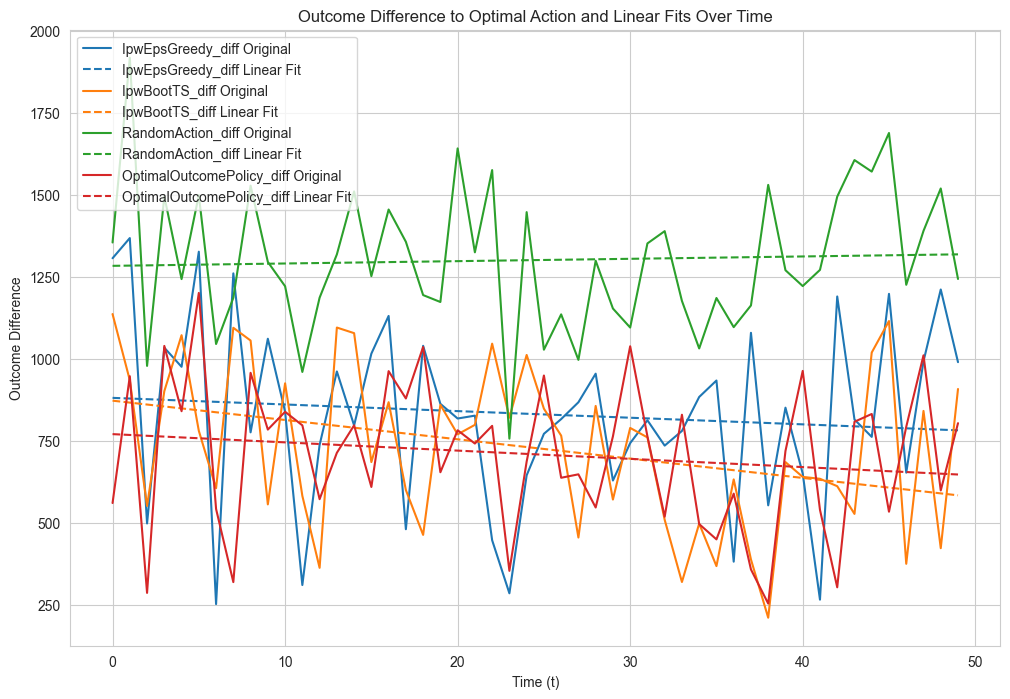

{'IpwEpsGreedy_diff': {'slope': -2.019140903834138,
  'intercept': 882.0892021795223},
 'IpwBootTS_diff': {'slope': -5.88895904022254,
  'intercept': 873.5232101097229},
 'RandomAction_diff': {'slope': 0.7146251484452328,
  'intercept': 1284.6113644441166},
 'OptimalOutcomePolicy_diff': {'slope': -2.511861523554101,
  'intercept': 771.502686001584}}

In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np


# Preparing data for linear regression
X = data_modified.index.values.reshape(-1, 1)  # Time as independent variable

# Initialize linear regression model
model = LinearRegression()

# Dictionary to store models for each column
models = {}

# Columns to fit linear models on
columns = ['IpwEpsGreedy_diff', 'IpwBootTS_diff', 'RandomAction_diff', 'OptimalOutcomePolicy_diff']

# Fitting linear models and storing coefficients
for col in columns:
    y = data_modified[col].values.reshape(-1, 1)  # Value differences as dependent variable
    model.fit(X, y)
    models[col] = {'slope': model.coef_[0][0], 'intercept': model.intercept_[0]}
    
colors = {
    'IpwEpsGreedy_diff': '#1f77b4',  # muted blue
    'IpwBootTS_diff': '#ff7f0e',    # safety orange
    'RandomAction_diff': '#2ca02c', # cooked asparagus green
    'OptimalOutcomePolicy_diff': '#d62728'  # brick red
}

# Plotting the original data and linear fits
plt.figure(figsize=(12, 8))

for col in columns:
    plt.plot(data_modified.index, data_modified[col], label=f'{col} Original', color = colors[col])
    # Generating linear fit line
    linear_fit = models[col]['slope'] * data_modified.index + models[col]['intercept']
    plt.plot(data_modified.index, linear_fit, label=f'{col} Linear Fit', linestyle='--', color = colors[col])

plt.title('Outcome Difference to Optimal Action and Linear Fits Over Time')
plt.xlabel('Time (t)')
plt.ylabel('Outcome Difference')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

models
